### Notebook for the cell-cell interaction research of healthy epithelial cells with liana package

- **Developed by:** Anna Maguza
- **Institute of Computational Biology - Computational Health Department - Helmholtz Munich**
- 21st June 2023

### Import required modules

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import liana as li
import anndata as ad

### Set up working environment

In [2]:
%matplotlib inline

In [3]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.3
-----
PIL                         9.4.0
appnope                     0.1.2
asttokens                   NA
backcall                    0.2.0
cffi                        1.15.1
comm                        0.1.2
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
executing                   0.8.3
fontTools                   4.39.3
h5py                        3.8.0
importlib_resources         NA
ipykernel                   6.19.2
ipython_genutils            0.2.0
jedi                        0.18.1
joblib                      1.2.0
jupyter_server              1.23.6
kiwisolver                  1.4.4
liana                       0.1.7
llvmlite                    0.39.1
matplotlib                  3.7.1
matplotlib_inline           0.1.6
mizani                      0.8.1
mpl_

In [4]:
def X_is_raw(adata):
    return np.array_equal(adata.X.sum(axis=0).astype(int), adata.X.sum(axis=0))

### Data Upload

In [9]:
input = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Cancer_dataset_integration/Datasets integration/healthy_epithelial/Integrated_Healthy_epithelial_datasets_5000.h5ad'
adata = sc.read_h5ad(input)
X_is_raw(adata)

True

In [10]:
# Extract the raw counts
adata = adata.raw.to_adata()
adata

AnnData object with n_obs × n_vars = 156195 × 26442
    obs: 'Sample_ID', 'Cell Type', 'Study_name', 'Donor_ID', 'Diagnosis', 'Age', 'Region code', 'Fraction', 'Sex', 'Library_Preparation_Protocol', 'batch', 'Age_group', 'Location', 'Cell States', 'Cell States GCA', 'Chem', 'Layer', 'Cell States Kong', 'dataset', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'pct_counts_ribo', 'Cell_ID', '_scvi_batch', '_scvi_labels', 'Unified Cell States', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'feature_types-0-0-0', 'gene_name-1-0-0', 'gene_id-0-0', 'GENE-1-0'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'neighbors', 'umap'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    obsp: 'connectivities', 'distances'

### Liana Run

In [11]:
# import all individual methods
import liana 
from liana.method import singlecellsignalr, connectome, cellphonedb, natmi, logfc, cellchat, geometric_mean

### Run CellChat

In [12]:
# rename column in adata.obs 'Unified Cell States' to 'Unified_Cell_States' 
adata.obs.rename(columns = {'Unified Cell States': 'Unified_Cell_States'}, inplace = True)

In [13]:
# Save raw counts in raw
adata.raw = adata

In [14]:
#run cellchat
cellchat(adata, groupby='Unified_Cell_States', expr_prop=0.1, verbose=True)

Using `.raw`!
1019 features of mat are empty, they will be removed.
Make sure that normalized counts are passed!


/Users/anna.maguza/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1667: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


0.08 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 156195 samples and 25423 features


100%|██████████| 1000/1000 [3:02:38<00:00, 10.96s/it]    


In [15]:
adata.obs['Unified_Cell_States'].value_counts()

Enterocyte                56398
TA                        40570
Stem cells                27658
Goblet cells              13051
Colonocyte                11707
Paneth cells               3468
Tuft cells                 1204
Epithelial cells           1141
Microfold cell              340
Enteroendocrine cells       311
L cells                     228
Enterochromaffin cells      119
Name: Unified_Cell_States, dtype: int64

In [16]:
#Write anndata object to file
adata.write('/Users/anna.maguza/Desktop/Data/Processed_datasets/Cell_cell_interaction/Healthy_epithelial/Liana/Epithelial_healthy_post-liana_cellChat_all_counts.h5ad')

In [24]:
adata = sc.read_h5ad('/Users/anna.maguza/Desktop/Data/Processed_datasets/Cell_cell_interaction/Healthy_epithelial/Liana/Epithelial_healthy_post-liana_cellChat_all_counts.h5ad')

In [6]:
adata.uns['liana_res']

,ligand,ligand_complex,ligand_props,ligand_trimean,mat_max,receptor,receptor_complex,receptor_props,receptor_trimean,source,target,lr_probs,cellchat_pvals
0,LGALS9,LGALS9,0.486034,0.000003,96791.0,LRP1,LRP1,0.223200,0.0,Colonocyte,Colonocyte,0.0,1.0
1,APP,APP,0.619458,0.000010,96791.0,LRP1,LRP1,0.223200,0.0,Colonocyte,Colonocyte,0.0,1.0
2,THBS1,THBS1,0.363287,0.000003,96791.0,LRP1,LRP1,0.223200,0.0,Colonocyte,Colonocyte,0.0,1.0
3,HSPG2,HSPG2,0.217135,0.000000,96791.0,LRP1,LRP1,0.223200,0.0,Colonocyte,Colonocyte,0.0,1.0
4,MDK,MDK,0.295635,0.000003,96791.0,LRP1,LRP1,0.223200,0.0,Colonocyte,Colonocyte,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,CALM1,CALM1,0.385382,0.000003,96791.0,KCNQ1,KCNQ1,0.156977,0.0,Tuft cells,Tuft cells,0.0,1.0
14995,CALM2,CALM2,0.679402,0.000013,96791.0,KCNQ1,KCNQ1,0.156977,0.0,Tuft cells,Tuft cells,0.0,1.0
14996,CALM3,CALM3,0.197674,0.000000,96791.0,KCNQ1,KCNQ1,0.156977,0.0,Tuft cells,Tuft cells,0.0,1.0
14997,ARF6,ARF6,0.110465,0.000000,96791.0,SMAP1,SMAP1,0.107973,0.0,Tuft cells,Tuft cells,0.0,1.0


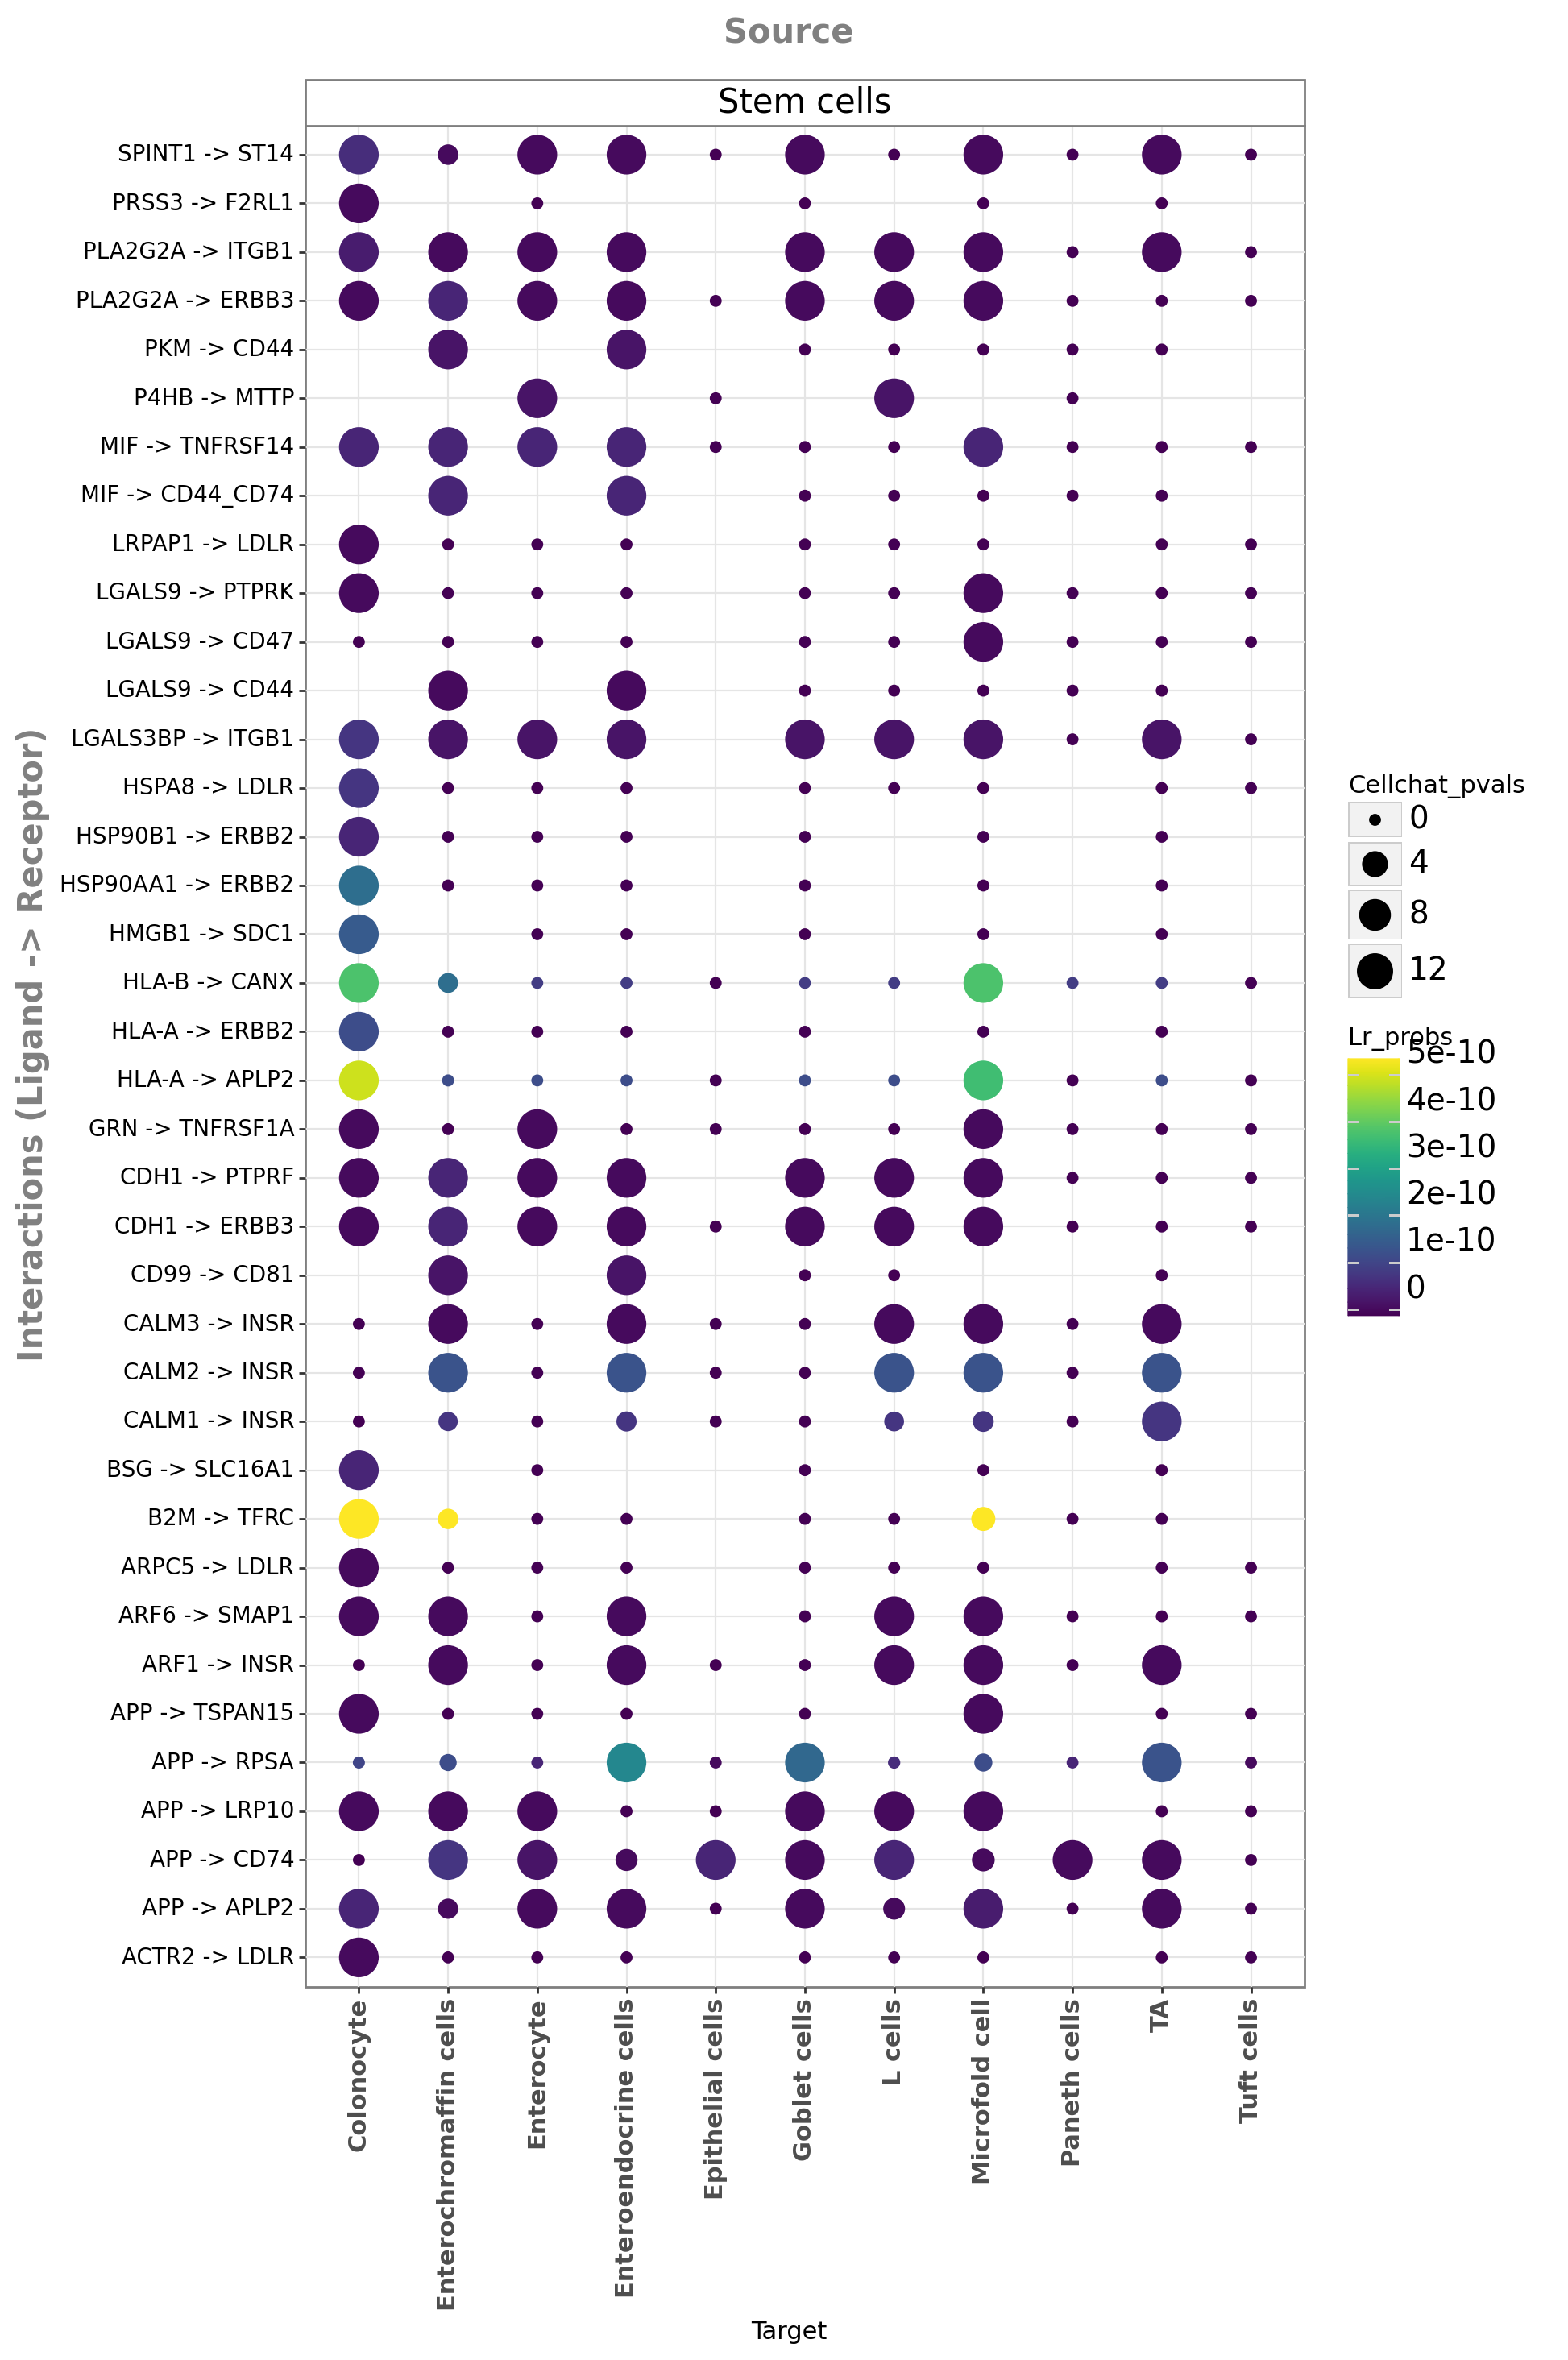

<ggplot: (909512494)>

In [26]:
li.pl.dotplot(adata = adata, 
              colour='lr_probs',
              size='cellchat_pvals',
              inverse_size=True, # we inverse sign since we want small p-values to have large sizes
              source_labels=['Stem cells'],
              target_labels=['Enterocyte', 'TA', 'Goblet cells', 'Colonocyte', 'Paneth cells', 'Tuft cells', 'Enterochromaffin cells', 'L cells', 'Enteroendocrine cells', 'Microfold cell', 'Epithelial cells'],
              figure_size=(8, 15),
              # finally, since cpdbv2 suggests using a filter to FPs
              # we filter the pvals column to <= 0.05
              filterby='cellchat_pvals',
              filter_lambda=lambda x: x <= 0.05
             )

### Omnipath

In [19]:
X_is_raw(adata)

True

In [20]:
#run omnipath
natmi(adata, groupby='Unified_Cell_States', verbose=True)

Using `.raw`!
1019 features of mat are empty, they will be removed.
Make sure that normalized counts are passed!


/Users/anna.maguza/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1667: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


0.08 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 156195 samples and 25423 features


In [21]:
#Write anndata object to file
adata.write('/Users/anna.maguza/Desktop/Data/Processed_datasets/Cell_cell_interaction/Healthy_epithelial/Liana/Epithelial_healthy_post-liana_omnipath_all_counts.h5ad')

In [15]:
adata = sc.read_h5ad('/Users/anna.maguza/Desktop/Data/Processed_datasets/Cell_cell_interaction/Healthy_epithelial/Liana/Epithelial_healthy_post-liana_omnipath_all_counts.h5ad')

In [16]:
adata.uns['liana_res']

,ligand,ligand_complex,ligand_means,ligand_means_sums,ligand_props,receptor,receptor_complex,receptor_means,receptor_means_sums,receptor_props,source,target,expr_prod,spec_weight
0,LGALS9,LGALS9,0.920357,4.894781,0.486034,LRP1,LRP1,0.331591,1.357579,0.223200,Colonocyte,Colonocyte,0.305182,0.045926
1,APP,APP,1.632822,10.619553,0.619458,LRP1,LRP1,0.331591,1.357579,0.223200,Colonocyte,Colonocyte,0.541429,0.037555
2,THBS1,THBS1,0.740737,2.565580,0.363287,LRP1,LRP1,0.331591,1.357579,0.223200,Colonocyte,Colonocyte,0.245622,0.070521
3,HSPG2,HSPG2,0.294092,1.092545,0.217135,LRP1,LRP1,0.331591,1.357579,0.223200,Colonocyte,Colonocyte,0.097518,0.065748
4,MDK,MDK,1.382257,17.463409,0.295635,LRP1,LRP1,0.331591,1.357579,0.223200,Colonocyte,Colonocyte,0.458344,0.019333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,CALM1,CALM1,1.034056,38.995316,0.385382,KCNQ1,KCNQ1,0.183555,1.428200,0.156977,Tuft cells,Tuft cells,0.189806,0.003408
14995,CALM2,CALM2,2.799009,38.753155,0.679402,KCNQ1,KCNQ1,0.183555,1.428200,0.156977,Tuft cells,Tuft cells,0.513772,0.009283
14996,CALM3,CALM3,0.283222,7.473307,0.197674,KCNQ1,KCNQ1,0.183555,1.428200,0.156977,Tuft cells,Tuft cells,0.051987,0.004871
14997,ARF6,ARF6,0.137874,4.993422,0.110465,SMAP1,SMAP1,0.146179,4.122686,0.107973,Tuft cells,Tuft cells,0.020154,0.000979


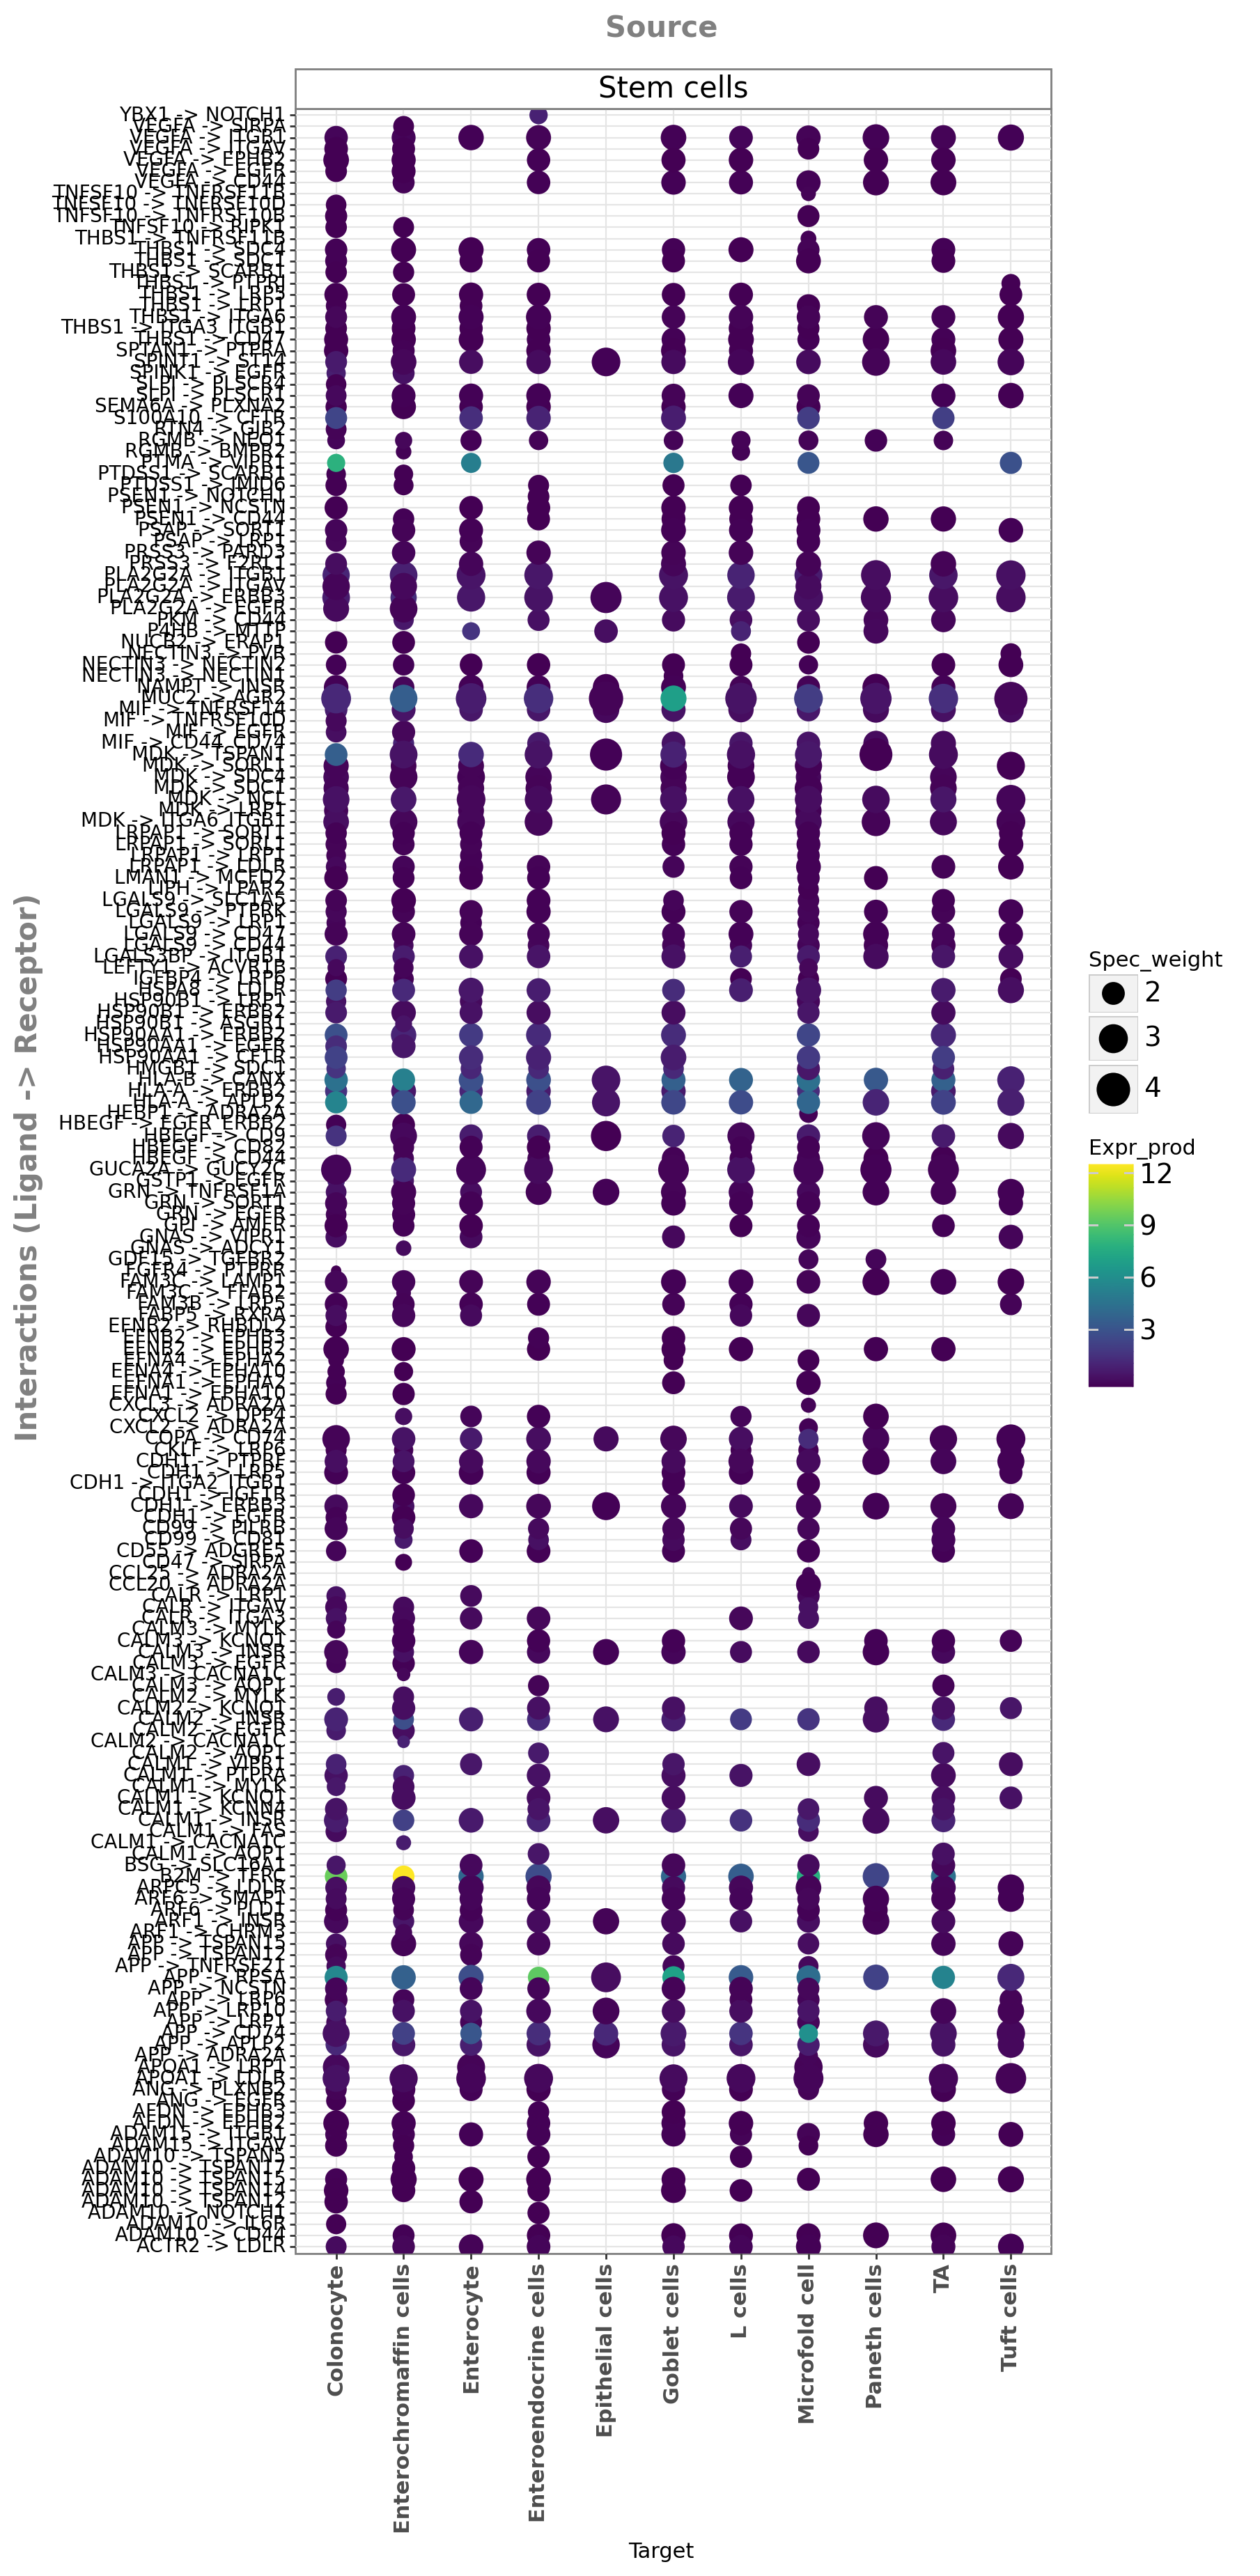

<ggplot: (903314363)>

In [22]:
li.pl.dotplot(adata = adata, 
              colour='expr_prod',
              size='spec_weight',
              inverse_size=True, # we inverse sign since we want small p-values to have large sizes
              source_labels=['Stem cells'],
              target_labels=['Enterocyte', 'TA', 'Goblet cells', 'Colonocyte', 'Paneth cells', 'Tuft cells', 'Enterochromaffin cells', 'L cells', 'Enteroendocrine cells', 'Microfold cell', 'Epithelial cells'],
              figure_size=(7, 20)
             )

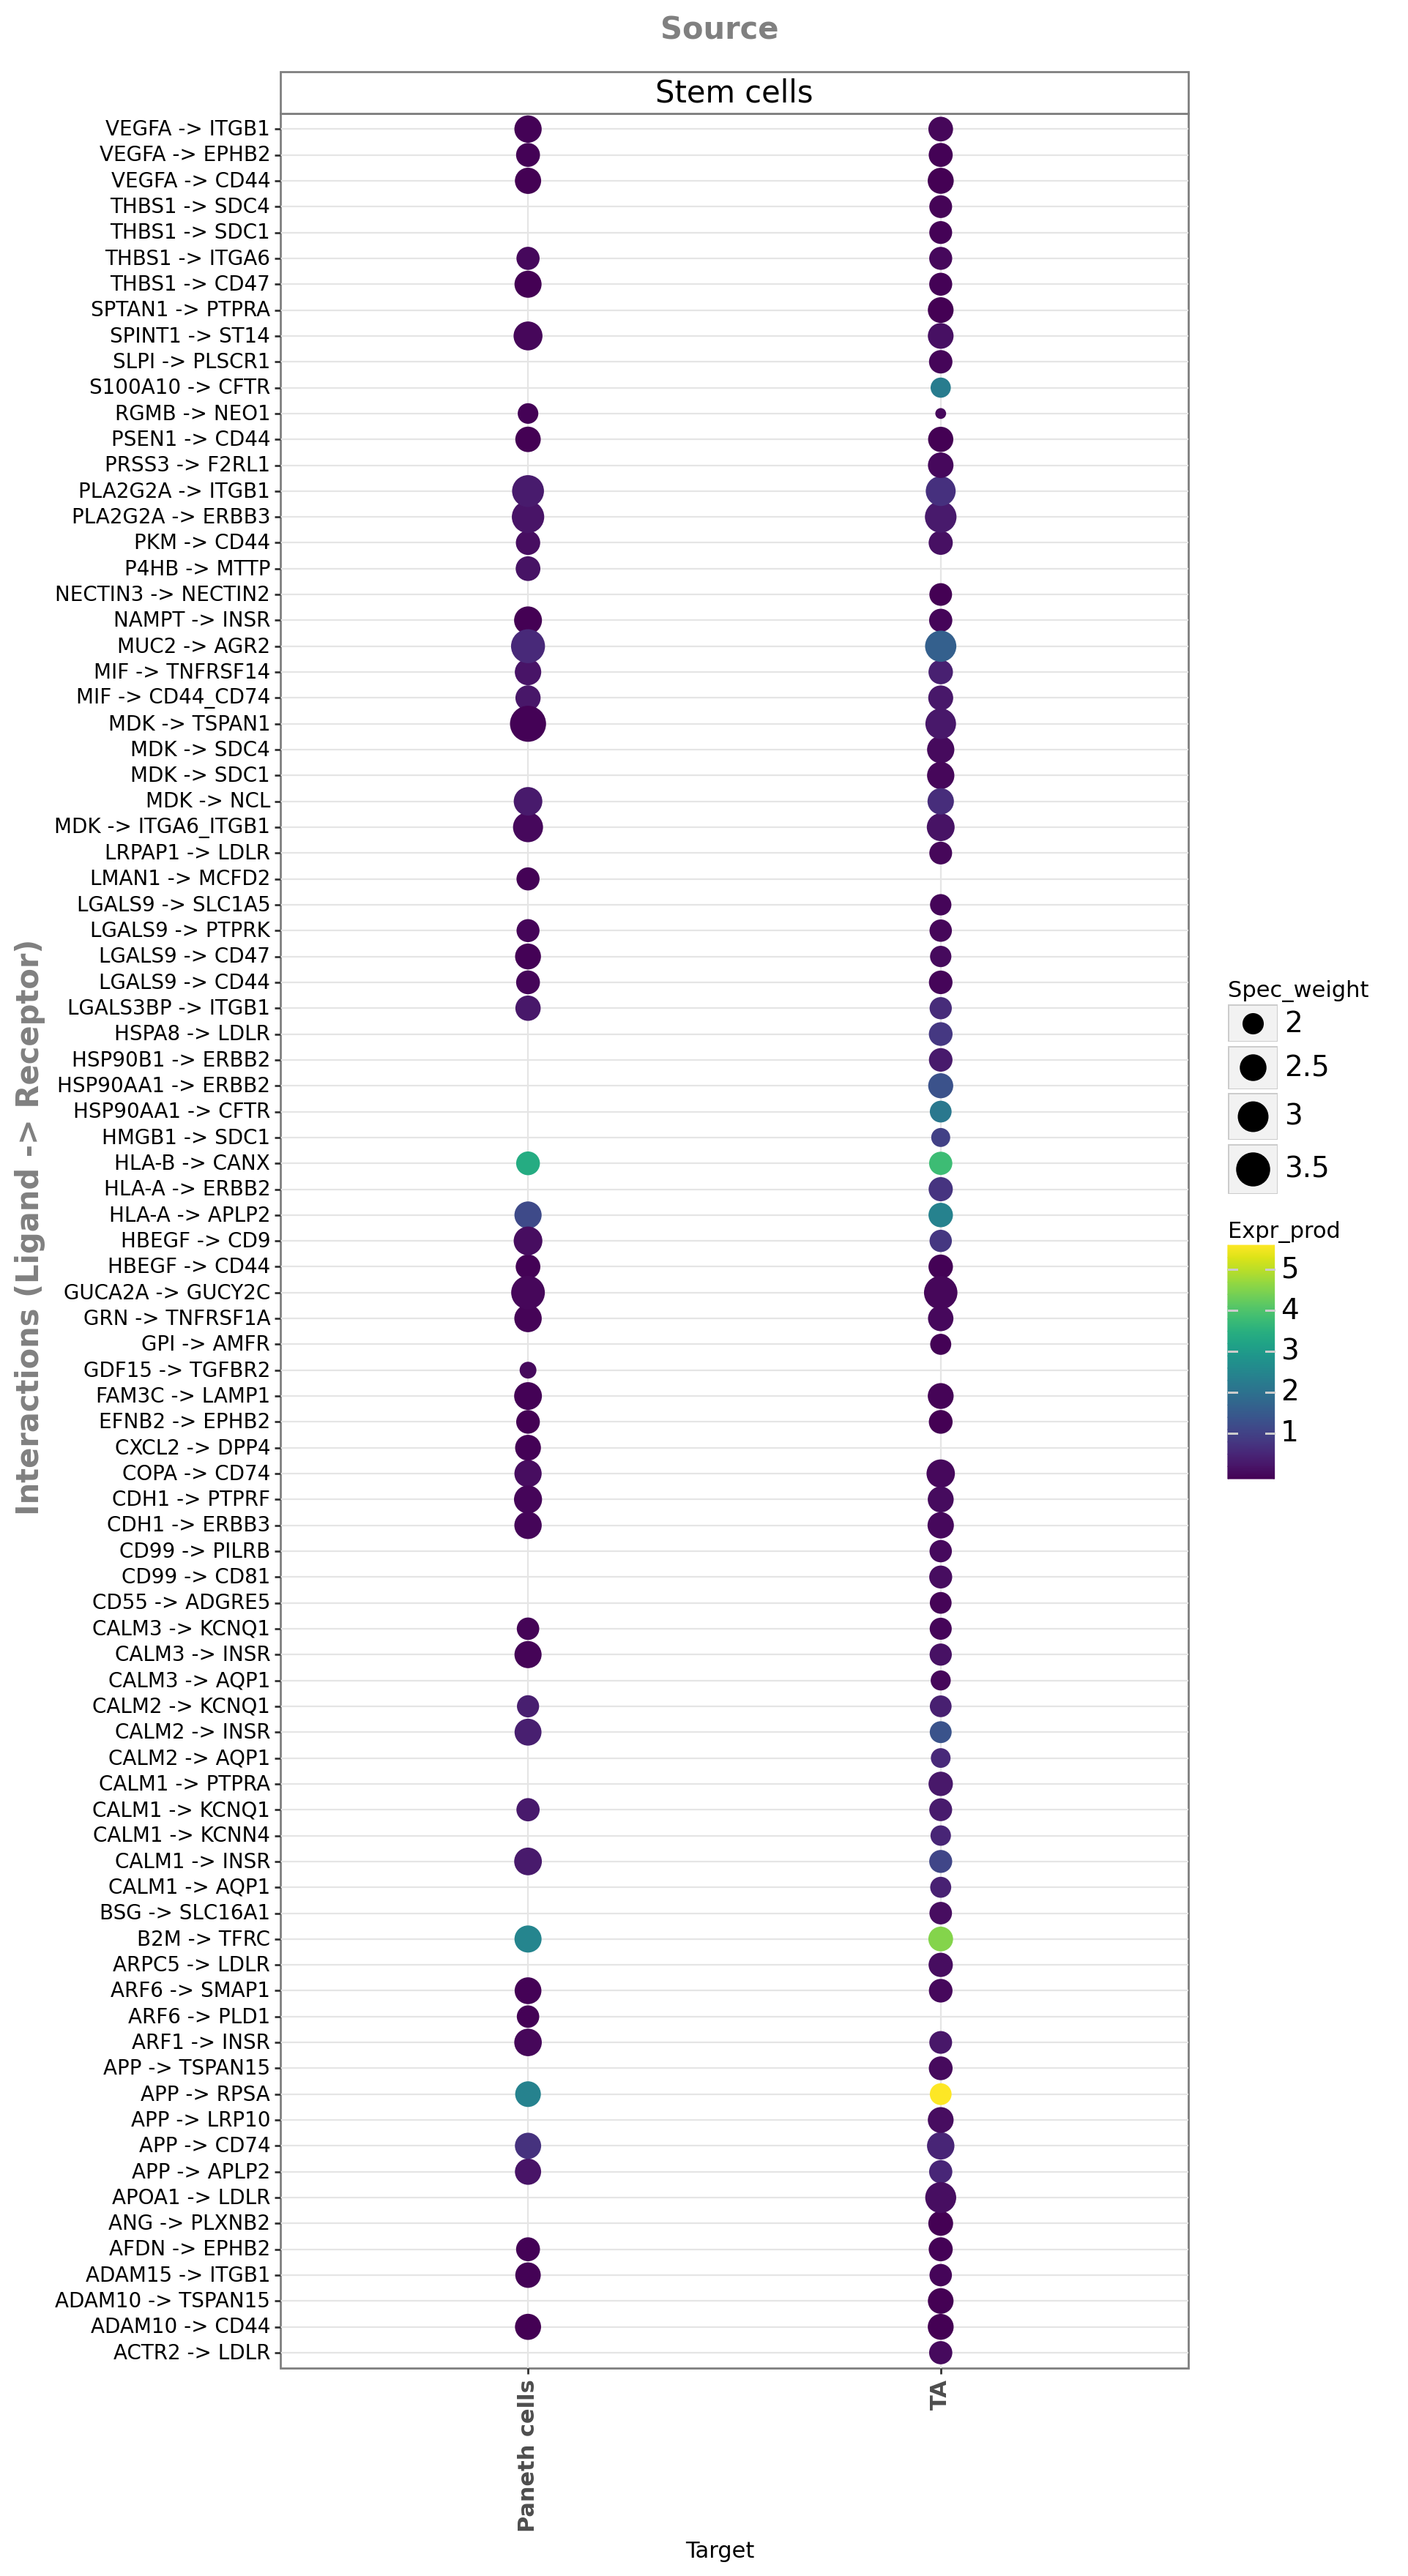

<ggplot: (905532642)>

In [23]:
li.pl.dotplot(adata = adata, 
              colour='expr_prod',
              size='spec_weight',
              inverse_size=True, # we inverse sign since we want small p-values to have large sizes
              source_labels=['Stem cells'],
              target_labels=['TA', 'Paneth cells'],
              figure_size=(8, 20)
             )

### Rank Aggregate

In [24]:
X_is_raw(adata)

True

In [25]:
adata.raw = ad.AnnData(adata.X, adata.obs, adata.var)

In [26]:
# Run rank_aggregate
li.mt.rank_aggregate(adata, groupby='Unified_Cell_States', expr_prop=0.1, verbose=True)

Using `.raw`!
1019 features of mat are empty, they will be removed.
Make sure that normalized counts are passed!


/Users/anna.maguza/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1667: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


0.08 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 156195 samples and 25423 features
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
Assuming that counts were `natural` log-normalized!


/Users/anna.maguza/miniconda3/envs/liana_env/lib/python3.9/site-packages/liana/method/_liana_pipe.py:422: RuntimeWarning: overflow encountered in power
/Users/anna.maguza/miniconda3/envs/liana_env/lib/python3.9/site-packages/liana/method/_liana_pipe.py:415: RuntimeWarning: invalid value encountered in subtract


Running CellPhoneDB


100%|██████████| 1000/1000 [01:38<00:00, 10.14it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|██████████| 1000/1000 [1:59:08<00:00,  7.15s/it]


In [27]:
adata.uns['liana_res'].head()

,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,lr_probs,cellchat_pvals,steady_rank,specificity_rank,magnitude_rank
2387,Enteroendocrine cells,Enterochromaffin cells,PYY,NPY1R,75.572204,0.0,104.933576,5.097728,NaN,0.427436,0.980417,1.867962e-09,0.0,NaN,NaN,2.544002e-08
2366,Enteroendocrine cells,Enterochromaffin cells,PYY,DPP4,75.870524,0.0,194.696123,3.458494,NaN,0.199188,0.985548,1.867962e-09,0.0,NaN,NaN,2.544002e-08
2737,L cells,Enterochromaffin cells,PYY,DPP4,72.090022,0.0,184.911289,3.307952,NaN,0.189178,0.985177,1.064071e-09,0.0,NaN,NaN,3.375771e-07
2759,L cells,Enterochromaffin cells,PYY,NPY1R,71.791702,0.0,99.659934,4.947185,NaN,0.405954,0.979916,1.064071e-09,0.0,NaN,NaN,3.375771e-07
6965,Goblet cells,Goblet cells,MUC2,AGR2,22.090557,0.0,487.188054,0.982004,NaN,0.247567,0.990815,1.440999e-08,0.0,NaN,NaN,3.624194e-07


In [28]:
#Write anndata object to file
adata.write('/Users/anna.maguza/Desktop/Data/Processed_datasets/Cell_cell_interaction/Healthy_epithelial/Liana/Epithelial_healthy_post-liana_aggregate_all_counts.h5ad')

In [37]:
adata = sc.read_h5ad('/Users/anna.maguza/Desktop/Data/Processed_datasets/Cell_cell_interaction/Healthy_epithelial/Liana/Epithelial_healthy_post-liana_aggregate.h5ad')

In [38]:
adata.obs['Unified_Cell_States'].value_counts()

Enterocyte                56398
TA                        40570
Stem cells                27658
Goblet cells              13051
Colonocyte                11707
Paneth cells               3468
Tuft cells                 1204
Epithelial cells           1141
Microfold cell              340
Enteroendocrine cells       311
L cells                     228
Enterochromaffin cells      119
Name: Unified_Cell_States, dtype: int64

/Users/anna.maguza/miniconda3/envs/liana_env/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 75 rows containing missing values.


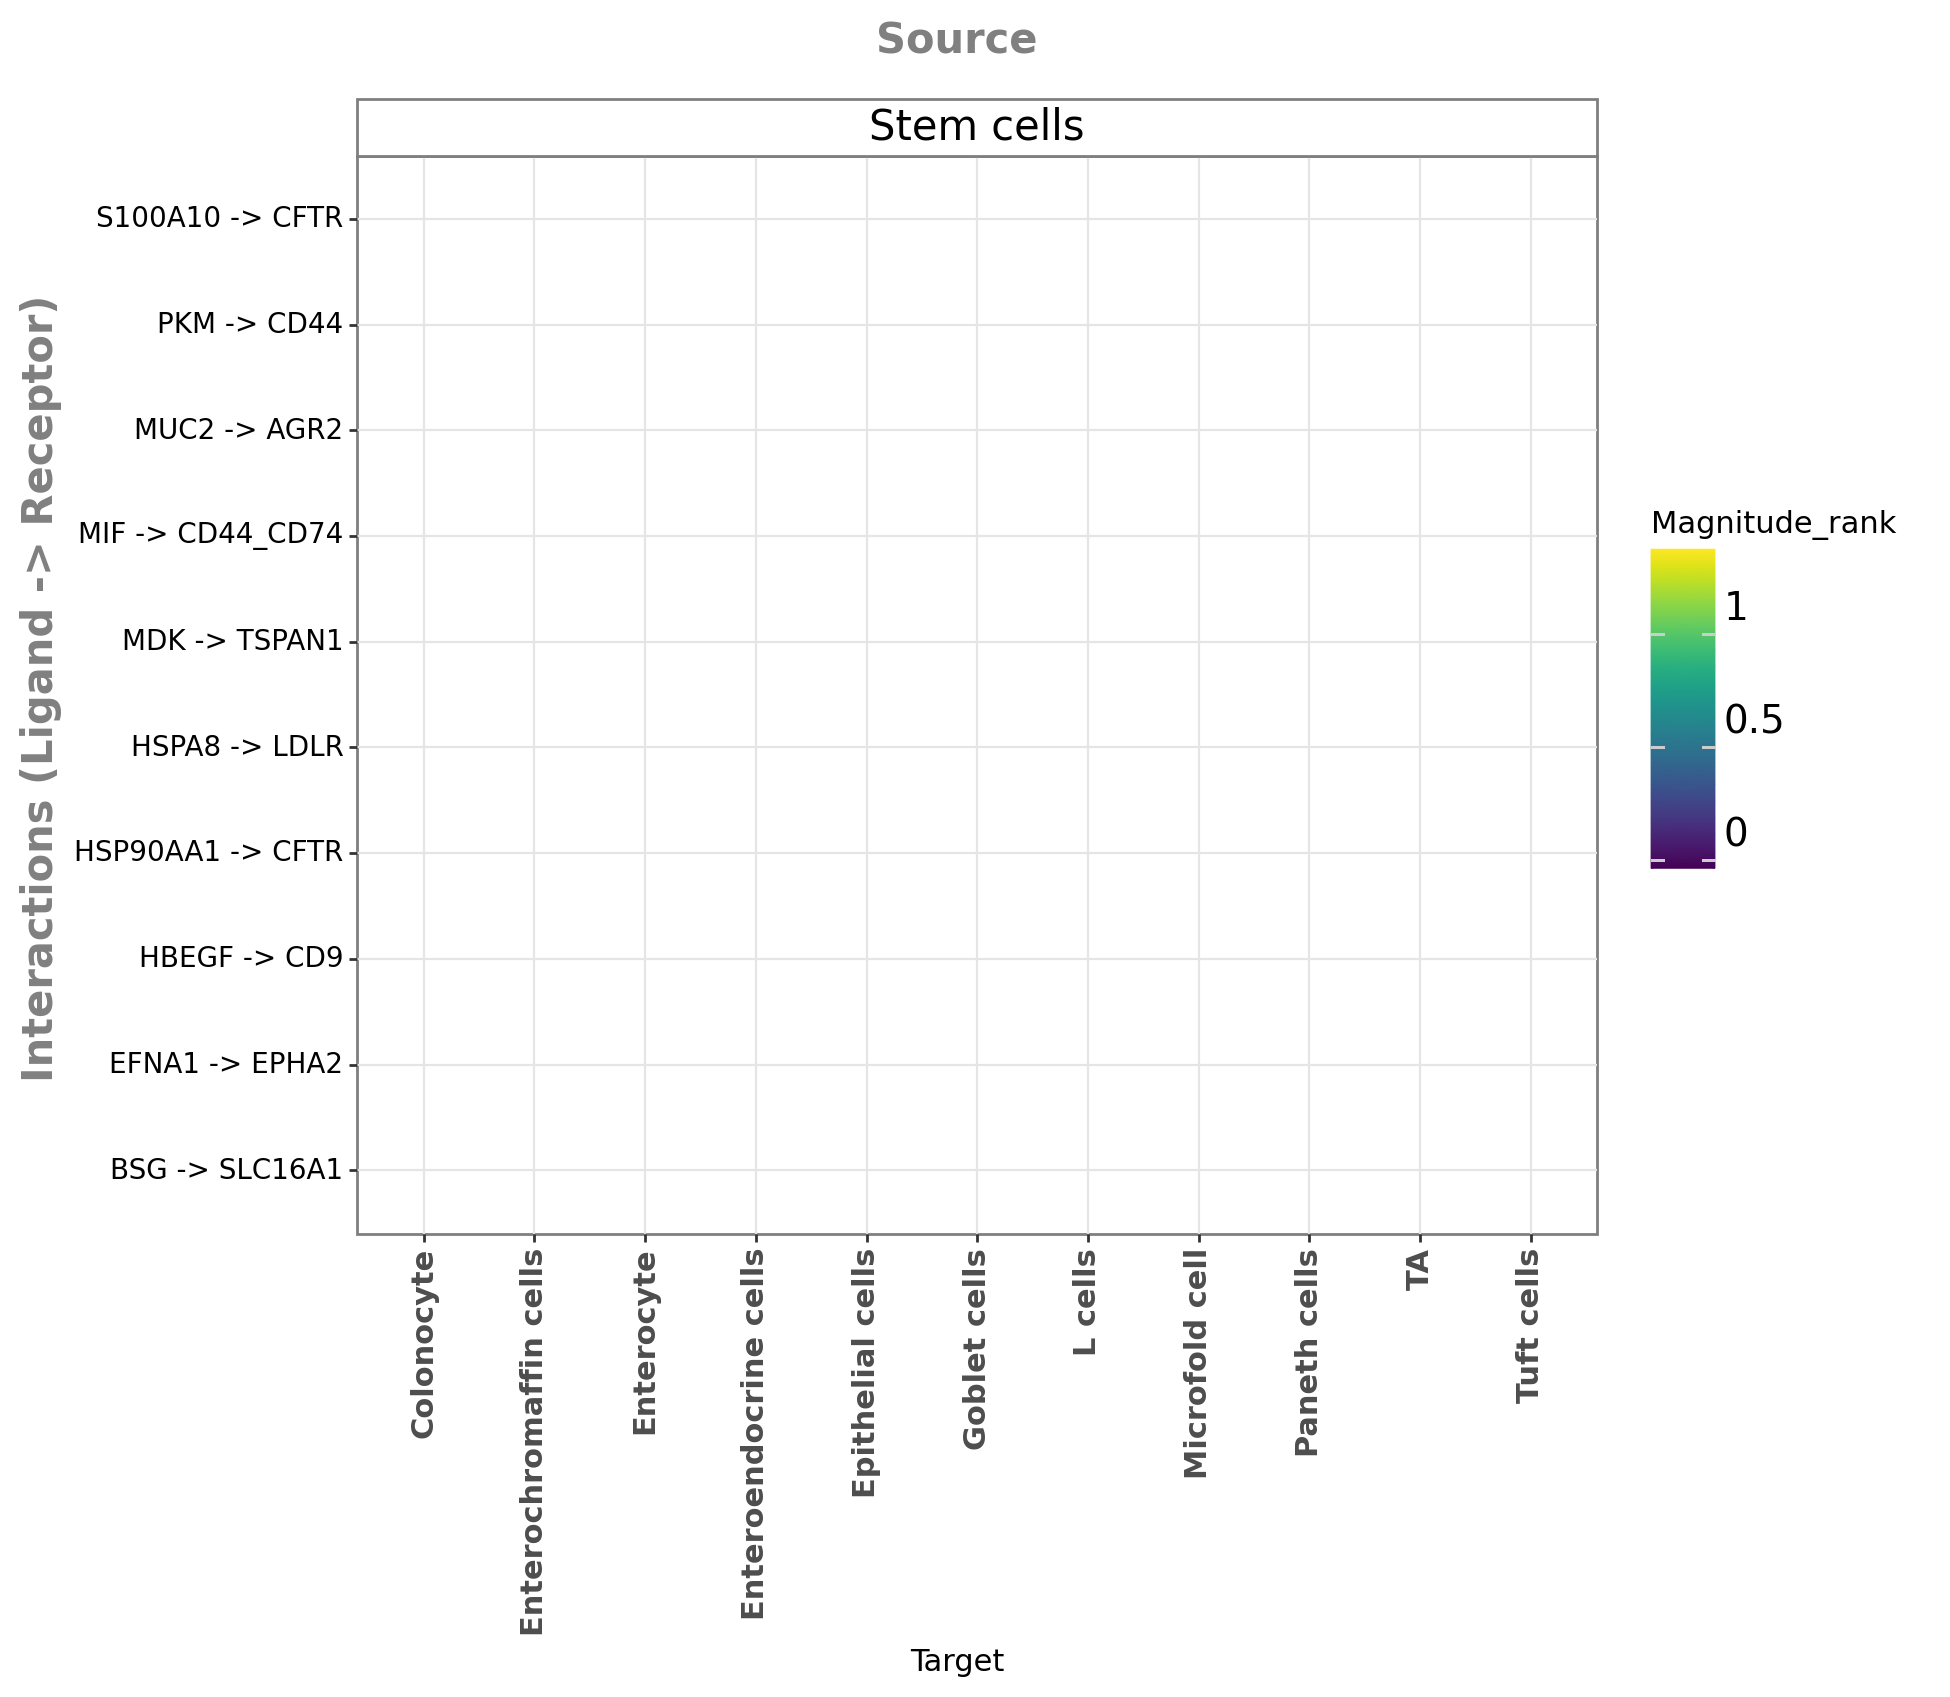

<ggplot: (672431770)>

In [39]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['Stem cells'],
              target_labels=['Enterocyte', 'TA', 'Goblet cells', 'Colonocyte', 'Paneth cells', 'Tuft cells', 'Enterochromaffin cells', 'L cells', 'Enteroendocrine cells', 'Microfold cell', 'Epithelial cells'],
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(8, 7)
             )